In [15]:
import sys
from __future__ import division

In [16]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

In [17]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 
from phasor import mechanical

b'2017-04-02 22:41:49 -0400 (87cf294591536591a3d2b62cc64392752bb95e54)'


[ 0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j  0.66666667+0.j
  0.66666667+0.j  0.66666

(0.1, 1.1)

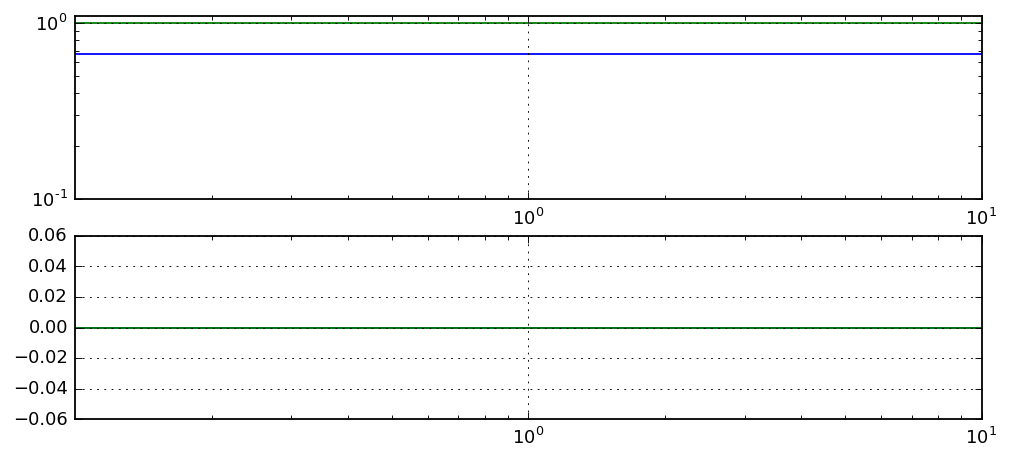

In [55]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.1, 10, 1000),
)
COM_kg = .0885
sys.own.M_com = mechanical.Mass(
    mass_kg = COM_kg,
)
sys.own.L1 = mechanical.Mass(
    mass_kg = 1 * 30677 / 1e9,
)
L_pend_m = .14
#halve the effective mass since there are two pendula for the single mass
k_pend = (COM_kg) * 9.81 / (L_pend_m)

#bounce mode is k_y, set here to be the pendulum k, which is wrong
sys.own.S_left = mechanical.TerminatorSpring(
    elasticity_N_m = k_pend,
)
sys.own.S_right = mechanical.TerminatorSpring(
    elasticity_N_m = k_pend,
)
sys.own.Ld_left = mechanical.Moment1D(
    displacement = -1,
)
sys.Ld_left.A.bond(sys.S_left.A)
sys.Ld_left.L.bond(sys.L1.A)
sys.own.M_com.A.bond(sys.Ld_left.B)

sys.own.Ld_right = mechanical.Moment1D(
    displacement = 2,
)
sys.Ld_right.A.bond(sys.S_right.A)
sys.Ld_right.L.bond(sys.L1.A)
sys.own.M_com.A.bond(sys.Ld_right.B)

#sys.own.FLd = mechanical.ForceSource()
#sys.own.FLd.A.bond(sys.M_com.A)

sys.own.FL = mechanical.DisplacementSource()
sys.own.FL.A.bond(sys.S_left.A)

sys.own.FR = mechanical.DisplacementSource()
sys.own.FR.A.bond(sys.S_right.A)

sys.own.RL = mechanical.DisplacementReadout(
    terminal = sys.S_left.A,
)
sys.own.RC = mechanical.DisplacementReadout(
    terminal = sys.M_com.A,
)

sys.own.RAC_DC = readouts.ACReadout(
    portD = sys.FL.d.i,
    portN = sys.RC.d.o,
)
sys.own.RAC_DC2 = readouts.ACReadout(
    portD = sys.FL.d.i,
    portN = sys.RL.d.o,
)


print(sys.RAC_DC.AC_sensitivity)
Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(sys.RAC_DC.F_Hz.val, np.ones_like(sys.RAC_DC.F_Hz.val) * abs(sys.RAC_DC.AC_sensitivity))
Fb.ax1.semilogx(sys.RAC_DC.F_Hz.val, np.ones_like(sys.RAC_DC.F_Hz.val) *np.angle(sys.RAC_DC.AC_sensitivity, deg = True))
Fb.ax0.loglog(sys.RAC_DC2.F_Hz.val, np.ones_like(sys.RAC_DC2.F_Hz.val) * abs(sys.RAC_DC2.AC_sensitivity))
Fb.ax1.semilogx(sys.RAC_DC2.F_Hz.val, np.ones_like(sys.RAC_DC2.F_Hz.val) *np.angle(sys.RAC_DC2.AC_sensitivity, deg = True))
#Fb.ax0.axvline(1.28)
#Fb.ax0.axvline(1.35)
Fb.ax0.set_ylim(.1,1.1)


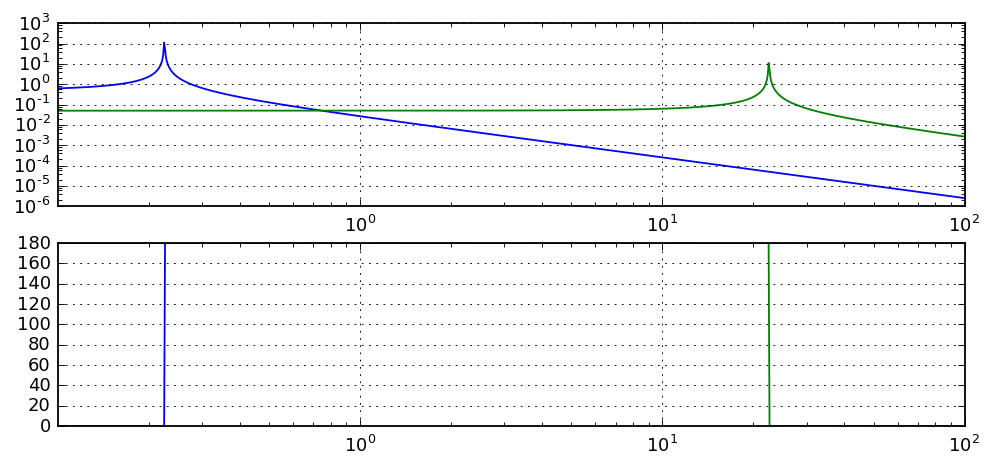

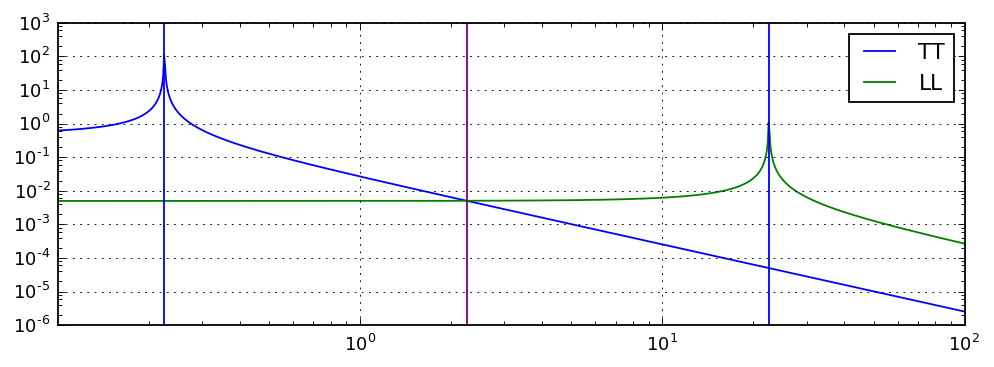

In [51]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.1, 100, 1000),
)
COM_kg = 1
sys.own.M_com = mechanical.Mass(
    mass_kg = COM_kg,
)
sys.own.L1 = mechanical.Mass(
    mass_kg = .01,
)
disp = 10
#bounce mode is k_y, set here to be the pendulum k, which is wrong
sys.own.S_left = mechanical.TerminatorSpring(
    elasticity_N_m = 1,
)
sys.own.S_right = mechanical.TerminatorSpring(
    elasticity_N_m = 1,
)
sys.own.Ld_left = mechanical.Moment1D(
    displacement = -disp,
)
sys.Ld_left.A.bond(sys.S_left.A)
sys.Ld_left.L.bond(sys.L1.A)
sys.own.M_com.A.bond(sys.Ld_left.B)

sys.own.Ld_right = mechanical.Moment1D(
    displacement = +disp,
)
sys.Ld_right.A.bond(sys.S_right.A)
sys.Ld_right.L.bond(sys.L1.A)
sys.own.M_com.A.bond(sys.Ld_right.B)

#sys.own.FLd = mechanical.ForceSource()
#sys.own.FLd.A.bond(sys.M_com.A)

sys.own.FL = mechanical.ForceSource()
sys.own.FL.A.bond(sys.S_left.A)

sys.own.F_T = mechanical.ForceSource()
sys.own.F_T.A.bond(sys.M_com.A)

sys.own.F_L = mechanical.ForceSource()
sys.own.F_L.A.bond(sys.L1.A)

sys.own.RC = mechanical.DisplacementReadout(
    terminal = sys.M_com.A,
)
sys.own.RL = mechanical.DisplacementReadout(
    terminal = sys.L1.A,
)

sys.own.RAC_LT = readouts.ACReadout(
    portD = sys.FL.F.i,
    portN = sys.RC.d.o,
)
sys.own.RAC_LL = readouts.ACReadout(
    portD = sys.FL.F.i,
    portN = sys.RL.d.o,
)
sys.own.RAC_T_T = readouts.ACReadout(
    portD = sys.F_T.F.i,
    portN = sys.RC.d.o,
)
sys.own.RAC_L_L = readouts.ACReadout(
    portD = sys.F_L.F.i,
    portN = sys.RL.d.o,
)


#print(sys.RAC_LL.AC_sensitivity)
Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_LT.AC_sensitivity))
Fb.ax1.semilogx(sys.RAC_LT.F_Hz.val, np.ones_like(sys.RAC_LT.F_Hz.val) *np.angle(sys.RAC_LT.AC_sensitivity, deg = True))
Fb.ax0.loglog(sys.RAC_LL.F_Hz.val, np.ones_like(sys.RAC_LL.F_Hz.val) * abs(sys.RAC_LL.AC_sensitivity))
Fb.ax1.semilogx(sys.RAC_LL.F_Hz.val, np.ones_like(sys.RAC_LL.F_Hz.val) *np.angle(sys.RAC_LL.AC_sensitivity, deg = True))

Fb = mplfigB(Nrows=1)
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, 
              np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_T_T.AC_sensitivity),
              label = 'TT',
             )
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, 
              np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_L_L.AC_sensitivity),
              label = 'LL',
             )
Fb.ax0.axvline((
    (
        +abs(sys.Ld_left.displacement)**2 * sys.S_left.elasticity_N_m
        +abs(sys.Ld_right.displacement)**2 * sys.S_right.elasticity_N_m)/sys.L1.mass_kg
)**.5/(2*np.pi))
Fb.ax0.axvline((
    (
        +sys.S_left.elasticity_N_m
        +sys.S_right.elasticity_N_m)/sys.L1.mass_kg
)**.5/(2*np.pi),
    color = 'purple',
)
Fb.ax0.axvline((
    (
        +sys.S_left.elasticity_N_m
        +sys.S_right.elasticity_N_m)/sys.M_com.mass_kg
)**.5/(2*np.pi))
Fb.ax0.legend()
#Fb.ax0.axvline(1.28)

#Fb.ax0.axvline(1.35)
#Fb.ax0.set_ylim(.1,10)


NEW! 8:  -10
NEW! 8:  5.0


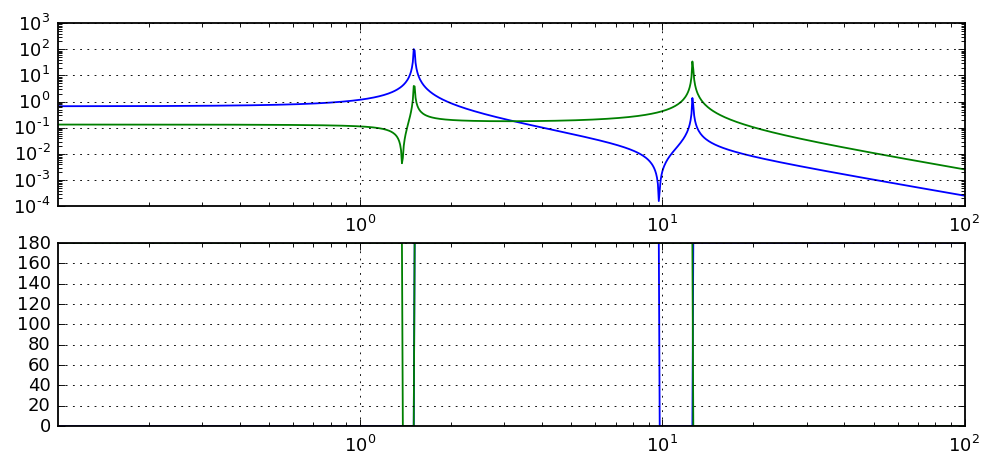

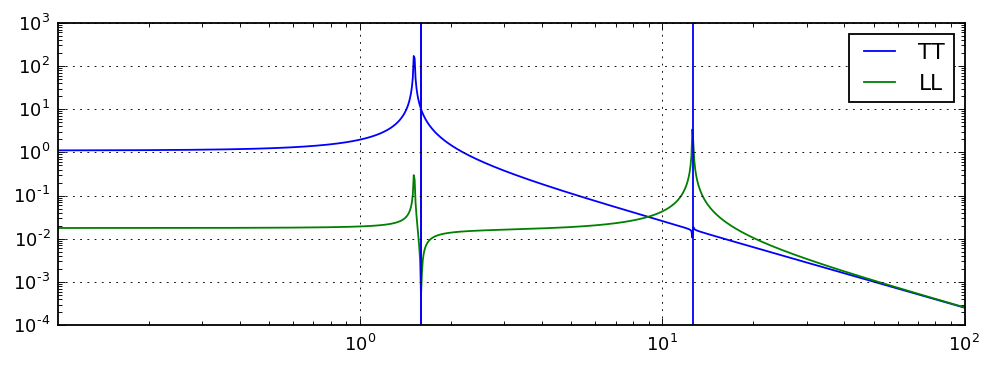

In [49]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.1, 100, 1000),
)
COM_kg = .01
sys.own.M_com = mechanical.Mass(
    mass_kg = COM_kg,
)
sys.own.L1 = mechanical.Mass(
    mass_kg = .01,
)
disp = 10
#bounce mode is k_y, set here to be the pendulum k, which is wrong
sys.own.S_left = mechanical.TerminatorSpring(
    elasticity_N_m = .5,
)
sys.own.S_right = mechanical.TerminatorSpring(
    elasticity_N_m = .5,
)
sys.own.Ld_left = mechanical.Moment1D(
    displacement = -disp,
    type = 2,
)
sys.Ld_left.A.bond(sys.S_left.A)
sys.Ld_left.L.bond(sys.L1.A)
sys.own.M_com.A.bond(sys.Ld_left.B)

sys.own.Ld_right = mechanical.Moment1D(
    displacement = +disp/2,
    type = 2,
)
sys.Ld_right.A.bond(sys.S_right.A)
sys.Ld_right.L.bond(sys.L1.A)
sys.own.M_com.A.bond(sys.Ld_right.B)

#sys.own.FLd = mechanical.ForceSource()
#sys.own.FLd.A.bond(sys.M_com.A)

sys.own.FL = mechanical.ForceSource()
sys.own.FL.A.bond(sys.S_left.A)

sys.own.F_T = mechanical.ForceSource()
sys.own.F_T.A.bond(sys.M_com.A)

sys.own.F_L = mechanical.ForceSource()
sys.own.F_L.A.bond(sys.L1.A)

sys.own.RC = mechanical.DisplacementReadout(
    terminal = sys.M_com.A,
)
sys.own.RL = mechanical.DisplacementReadout(
    terminal = sys.L1.A,
)

sys.own.RAC_LT = readouts.ACReadout(
    portD = sys.FL.F.i,
    portN = sys.RC.d.o,
)
sys.own.RAC_LL = readouts.ACReadout(
    portD = sys.FL.F.i,
    portN = sys.RL.d.o,
)
sys.own.RAC_T_T = readouts.ACReadout(
    portD = sys.F_T.F.i,
    portN = sys.RC.d.o,
)
sys.own.RAC_L_L = readouts.ACReadout(
    portD = sys.F_L.F.i,
    portN = sys.RL.d.o,
)


#print(sys.RAC_LL.AC_sensitivity)
Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_LT.AC_sensitivity))
Fb.ax1.semilogx(sys.RAC_LT.F_Hz.val, np.ones_like(sys.RAC_LT.F_Hz.val) *np.angle(sys.RAC_LT.AC_sensitivity, deg = True))
Fb.ax0.loglog(sys.RAC_LL.F_Hz.val, np.ones_like(sys.RAC_LL.F_Hz.val) * abs(sys.RAC_LL.AC_sensitivity))
Fb.ax1.semilogx(sys.RAC_LL.F_Hz.val, np.ones_like(sys.RAC_LL.F_Hz.val) *np.angle(sys.RAC_LL.AC_sensitivity, deg = True))

Fb = mplfigB(Nrows=1)
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, 
              np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_T_T.AC_sensitivity),
              label = 'TT',
             )
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, 
              np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_L_L.AC_sensitivity),
              label = 'LL',
             )
Fb.ax0.axvline((
    (
        +abs(sys.Ld_left.displacement)**2 * sys.S_left.elasticity_N_m
        +abs(sys.Ld_right.displacement)**2 * sys.S_right.elasticity_N_m)/sys.L1.mass_kg
)**.5/(2*np.pi))
Fb.ax0.axvline((
    (
        +sys.S_left.elasticity_N_m
        +sys.S_right.elasticity_N_m)/sys.L1.mass_kg
)**.5/(2*np.pi),
    color = 'purple',
)
Fb.ax0.axvline((
    (
        +sys.S_left.elasticity_N_m
        +sys.S_right.elasticity_N_m)/sys.M_com.mass_kg
)**.5/(2*np.pi))
Fb.ax0.legend()
#Fb.ax0.axvline(1.28)

#Fb.ax0.axvline(1.35)
#Fb.ax0.set_ylim(.1,10)


NameError: name 'sys2' is not defined

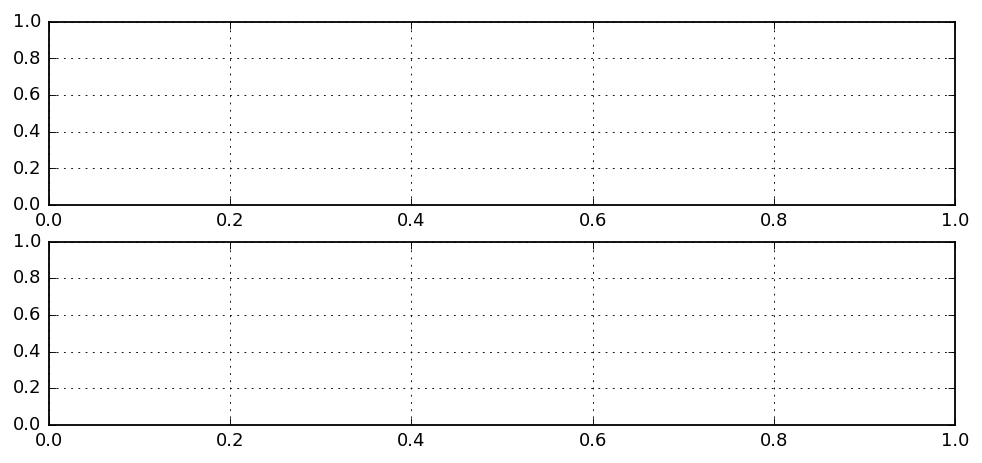

In [21]:
Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(
    sys2.RAC_LT.F_Hz.val, np.ones_like(sys2.RAC_LT.F_Hz.val) * abs(sys2.RAC_LT.AC_sensitivity),
    label = 'LT2',
    )
Fb.ax1.semilogx(
    sys2.RAC_LT.F_Hz.val, np.ones_like(sys2.RAC_LT.F_Hz.val) *np.angle(sys2.RAC_LT.AC_sensitivity, deg = True),
    )
Fb.ax0.loglog(
    sys2.RAC_LL.F_Hz.val, np.ones_like(sys2.RAC_LL.F_Hz.val) * abs(sys2.RAC_LL.AC_sensitivity),
    label = 'LL2',
    )
Fb.ax1.semilogx(
    sys2.RAC_LL.F_Hz.val, np.ones_like(sys2.RAC_LL.F_Hz.val) *np.angle(sys2.RAC_LL.AC_sensitivity, deg = True),
)


Fb.ax0.loglog(
    sys.RAC_LT.F_Hz.val, np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_LT.AC_sensitivity),
    label = 'LT1',
)
Fb.ax1.semilogx(
    sys.RAC_LT.F_Hz.val, np.ones_like(sys.RAC_LT.F_Hz.val) *np.angle(sys.RAC_LT.AC_sensitivity, deg = True),
    )
Fb.ax0.loglog(
    sys.RAC_LL.F_Hz.val, np.ones_like(sys.RAC_LL.F_Hz.val) * abs(sys.RAC_LL.AC_sensitivity),
    label = 'LL1',
    )
Fb.ax1.semilogx(
    sys.RAC_LL.F_Hz.val, np.ones_like(sys.RAC_LL.F_Hz.val) *np.angle(sys.RAC_LL.AC_sensitivity, deg = True),
    )
Fb.ax0.legend()

Fb = mplfigB(Nrows=1)
Fb.ax0.loglog(sys2.RAC_LT.F_Hz.val, 
              np.ones_like(sys2.RAC_LT.F_Hz.val) * abs(sys2.RAC_RT.AC_sensitivity + sys2.RAC_LT.AC_sensitivity),
              label = 'CT',
             )
Fb.ax0.loglog(sys2.RAC_LT.F_Hz.val, 
              np.ones_like(sys2.RAC_LT.F_Hz.val) * abs(sys2.RAC_RT.AC_sensitivity - sys2.RAC_LT.AC_sensitivity),
              label = 'DT',
             )
Fb.ax0.loglog(sys2.RAC_LL.F_Hz.val, 
              np.ones_like(sys2.RAC_LL.F_Hz.val) * abs(sys2.RAC_RL.AC_sensitivity + sys2.RAC_LL.AC_sensitivity),
              label = 'CL',
             )
Fb.ax0.loglog(sys2.RAC_LL.F_Hz.val, 
              np.ones_like(sys2.RAC_LL.F_Hz.val) * abs(sys2.RAC_RL.AC_sensitivity - sys2.RAC_LL.AC_sensitivity),
              label = 'DL',
              )             
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, 
              np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_RT.AC_sensitivity + sys.RAC_LT.AC_sensitivity),
              label = 'CT1',
             )
Fb.ax0.loglog(sys.RAC_LT.F_Hz.val, 
              np.ones_like(sys.RAC_LT.F_Hz.val) * abs(sys.RAC_RT.AC_sensitivity - sys.RAC_LT.AC_sensitivity),
              label = 'DT1',
             )
Fb.ax0.loglog(sys.RAC_LL.F_Hz.val, 
              np.ones_like(sys.RAC_LL.F_Hz.val) * abs(sys.RAC_RL.AC_sensitivity + sys.RAC_LL.AC_sensitivity),
              label = 'CL1',
             )
Fb.ax0.loglog(sys.RAC_LL.F_Hz.val, 
              np.ones_like(sys.RAC_LL.F_Hz.val) * abs(sys.RAC_RL.AC_sensitivity - sys.RAC_LL.AC_sensitivity),
              label = 'DL1',
              )             
Fb.ax0.legend()

In [ ]:
np.linalg.inv(np.array([[2,2],[1,-1]]))

In [ ]:
100 / 6.28

In [ ]:
(31.376 + 44.82)/2